In [150]:
# Reservado para possíveis instalações de bibliotecas

# Informação dos dados

**Dataset de Doenças Cardiovasculares**

**Fonte**: [Kaggle](https://www.kaggle.com/datasets/sulianova/cardiovascular-disease-dataset/data)

**Objectivo**: Diagnóstico de doenças cardiovasculares com machine learning

**Estado dos dados**: Não existem dados nulos e duplicados.

**Obs**: Todos dados de entrada foram recolhidos durante o exame médico.

# Importação de Bibliotecas

Nesta secção, foram importadas as bibliotecas necessárias para a execução do projecto de Mineração de Dados.

In [151]:
# Reservado para importações de possíveis bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import zscore
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score, classification_report

# Carregamento do Dataset Cardiovascular Disease

Nesta secção, fez-se o carregamento do dataset **Cardiovascular Disease**, do tipo **csv**.

In [152]:
# Carregamento de dados, para um ficheiro csv em python
cardio_dataset = pd.read_csv("cardio_train.csv", delimiter=";")

# Descrição dos Dados

**Atributos do Dataset:**

Existem 3 tipos de atributos de entrada:

1. **Objectivo**: informação factual. Consideram-se os seguintes:

  * age: atributo numérico, representa a idade em anos.
  * height: atributo numérico, representa a altura em cm.
  * weight: atributo numérico, representa o peso em kg.
  * gender: atributo categórico, serve para diferenciar os diferentes gêneros, onde 1 representa as mulheres e 2 os homens.


2. **Exame**: resultados do exame médico. Consideram-se as seguintes:

  * ap_hi: atributo numérico, representa a pressão arterial sistólica.
  * ap_lo: atributo numérico, representa a pressão arterial diastólica.
  * cholesterol: atributo numérico, representa o colesterol, sendo que os seus valores significam respectivamente: 1: normal, 2: acima do normal, 3: bem acima do normal.
  * glic: atributo numérico, representa a Glicose, sendo que os seus valores significam respectivamente: 1: normal, 2: acima do normal, 3: bem acima do normal.


3. **Subjetivo**: informações fornecidas pelo paciente. Consideram-se as seguintes:

  * smoke: atributo categórico, infoma se o paciente fuma (1) ou não fuma (0).
  * alco: atributo categórico, infoma se o paciente ingere (1) ou não ingere (0) álcool.
  * active: atributo categórico, infoma se o pratica (1) ou não practica (0) actividade física.
  * cardio: é o target, informa a ausência (0) ou presença (1) de doença cardiovascular.

In [153]:
# Verificar as Chaves(Keys) do dataset
cardio_dataset.keys()

Index(['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')

**Estrutura do Dataset**

O dataset contém no total, sensivelmente **70000** amostras e **13** colunas, cada contendo informações importantes para a análise.

In [154]:
# Verificar a estrutura do dataset
cardio_dataset.shape

(70000, 13)

In [155]:
# Obter mais detalhes do dataset
cardio_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [156]:
# Verificar as 5 primeiras linhas do dataset
cardio_dataset.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [157]:
# Verificar as 5 últimas linhas do dataset
cardio_dataset.tail()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1
69999,99999,20540,1,170,72.0,120,80,2,1,0,0,1,0


**Estatística Descritiva**

Pode-se obter a informação geral de cada coluna tendo em conta ao número total, média, desvio padrão, valores mínimo e máximo, mediana e os dados do primeiro e terceiro quadrante.

In [229]:
# Obter informações estatísticas do dataset
cardio_dataset.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [230]:
cardio_dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
id,70000.0,49972.419900,28851.302323,0.0,25006.75,50001.5,74889.25,99999.0
age,70000.0,19468.865814,2467.251667,10798.0,17664.00,19703.0,21327.00,23713.0
gender,70000.0,1.349571,0.476838,1.0,1.00,1.0,2.00,2.0
height,70000.0,164.359229,8.210126,55.0,159.00,165.0,170.00,250.0
weight,70000.0,74.205690,14.395757,10.0,65.00,72.0,82.00,200.0
ap_hi,70000.0,128.817286,154.011419,-150.0,120.00,120.0,140.00,16020.0
ap_lo,70000.0,96.630414,188.472530,-70.0,80.00,80.0,90.00,11000.0
cholesterol,70000.0,1.366871,0.680250,1.0,1.00,1.0,2.00,3.0
gluc,70000.0,1.226457,0.572270,1.0,1.00,1.0,1.00,3.0
smoke,70000.0,0.088129,0.283484,0.0,0.00,0.0,0.00,1.0


# Verificar a Qualidade dos Dados



O dataset é quase perfeito por não existir **duplicidade** e **ausência de valores**. Contudo, pode-se encontrar **outliers**, isto nas features **weight**, **ap_hi**, **ap_lo**.


In [159]:
# Verificar duplicidade
cardio_dataset.duplicated().sum()

0

In [160]:
# Verificar valores nulos
cardio_dataset.isnull().sum().sum()

0

In [161]:
cardio_dataset[cardio_dataset.weight<30].head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
26806,38312,23284,1,157,23.0,110,80,1,1,0,0,1,0
29488,42156,20408,2,177,22.0,120,80,1,1,1,1,1,0
33817,48318,21582,2,178,11.0,130,90,1,1,0,0,1,1
34276,48976,14664,2,128,28.0,120,80,1,1,0,0,1,0
57858,82567,18804,2,165,10.0,180,1100,2,2,0,0,1,1


In [162]:
cardio_dataset[(cardio_dataset.ap_hi<0)].head(10)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
4607,6525,15281,1,165,78.0,-100,80,2,1,0,0,1,0
16021,22881,22108,2,161,90.0,-115,70,1,1,0,0,1,0
20536,29313,15581,1,153,54.0,-100,70,1,1,0,0,1,0
23988,34295,18301,1,162,74.0,-140,90,1,1,0,0,1,1
25240,36025,14711,2,168,50.0,-120,80,2,1,0,0,0,1
35040,50055,23325,2,168,59.0,-150,80,1,1,0,0,1,1
46627,66571,23646,2,160,59.0,-120,80,1,1,0,0,0,0


In [163]:
cardio_dataset[(cardio_dataset.ap_hi>=0) & (cardio_dataset.ap_hi<10)]

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
5382,7657,21240,1,162,69.0,7,80,1,1,0,0,1,0
8757,12494,16905,2,163,63.0,1,2088,1,1,1,0,1,0
42334,60477,18716,1,171,80.0,1,1088,1,1,0,0,1,1


In [164]:
cardio_dataset[(cardio_dataset.ap_hi>=10) & (cardio_dataset.ap_hi<50)].head(10)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
567,815,21281,1,168,78.0,14,90,2,1,0,0,1,1
927,1294,21867,2,175,70.0,14,90,3,1,0,0,1,1
979,1360,18225,1,172,65.0,11,80,1,3,0,0,1,0
1600,2260,19201,1,165,66.0,12,80,1,1,0,0,1,0
1627,2301,22591,1,165,71.0,14,80,1,1,0,0,1,1
1772,2505,14365,2,168,64.0,11,60,1,1,1,1,1,0
2167,3057,21945,2,169,75.0,14,80,2,1,0,0,1,1
2203,3112,21776,2,187,80.0,12,80,1,1,1,0,1,0
2431,3424,18472,2,165,84.0,14,80,1,1,0,0,1,1
2528,3572,15267,1,163,86.0,12,80,1,1,0,0,0,0


In [165]:
cardio_dataset[(cardio_dataset.ap_hi > 1000)].head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
7763,11089,21032,1,175,80.0,11500,90,1,1,0,0,1,1
8915,12710,18870,1,164,75.0,1420,80,2,1,0,0,1,1
13895,19827,15996,1,168,72.0,1500,80,1,1,0,0,1,1
25464,36339,15835,2,169,75.0,14020,80,2,1,0,0,1,1
25519,36414,21361,1,169,71.0,14020,80,3,3,0,0,1,1


In [166]:
cardio_dataset[(cardio_dataset.ap_lo < 0)]

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
60106,85816,22571,1,167,74.0,15,-70,1,1,0,0,1,1


In [167]:
cardio_dataset[(cardio_dataset.ap_lo>=0) & (cardio_dataset.ap_lo<20)].head(10)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
2014,2845,22712,2,167,59.0,906,0,1,1,0,0,1,0
6737,9610,16705,1,156,61.0,150,10,1,1,0,0,0,1
7598,10843,14661,2,70,72.0,120,8,1,1,0,0,1,0
9777,13943,21802,1,166,125.0,120,8,3,1,0,0,1,1
10106,14410,18334,1,152,50.0,150,10,3,1,0,0,1,1
13489,19258,14965,2,150,60.0,130,0,1,1,0,0,0,0
16459,23512,20457,1,156,50.0,138,0,3,1,0,0,1,1
17381,24837,18226,1,164,78.0,138,0,1,1,0,0,1,0
18898,26983,17531,1,171,68.0,110,7,1,1,0,0,1,0
19075,27242,19771,2,168,68.0,110,7,1,1,0,0,1,0


In [168]:
cardio_dataset[(cardio_dataset.ap_lo>=20) & (cardio_dataset.ap_lo<40)].head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
418,594,16658,1,157,72.0,150,30,1,1,0,0,1,1
5333,7590,20984,1,164,102.0,120,30,2,1,0,0,1,0
8797,12550,21155,1,162,68.0,110,20,1,1,0,0,1,0
11820,16884,18171,1,169,69.0,128,20,1,1,0,0,1,1
13935,19885,18007,1,164,74.0,110,20,1,1,0,0,1,0


In [169]:
cardio_dataset[cardio_dataset.ap_lo > 200].shape

(953, 13)

In [170]:
cardio_dataset[(cardio_dataset.ap_lo > 10000)].head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
43326,61901,23221,1,160,105.0,200,11000,1,1,0,0,1,1


In [171]:
cardio_dataset.gender.unique()

array([2, 1])

In [172]:
cardio_dataset.cholesterol.unique()

array([1, 3, 2])

In [173]:
cardio_dataset.gluc.unique()

array([1, 2, 3])

In [174]:
cardio_dataset.smoke.unique()

array([0, 1])

In [175]:
cardio_dataset.alco.unique()

array([0, 1])

In [176]:
cardio_dataset.active.unique()

array([1, 0])

In [177]:
cardio_dataset.cardio.unique()

array([0, 1])

# Tratamento dos dados

Inicialmente, fez-se uma cópia do dataset original para não afectar directamente os dados de origem. Depois, fez-se a avaliação dos dados das variáveis **ap_hi** e **ap_lo**.
Para avaliar o **ap_hi** e o **ap_lo**, usou-se a [Calculadora de pressão arterial](https://bloodpressureok.com/reading/300-over-200/).
O algoritmo considera as seguintes condições:
* 50 <= **ap_hi** <= 300
* 40 <= **ap_lo** <= 200
* **ap_hi** < **ap_lo**



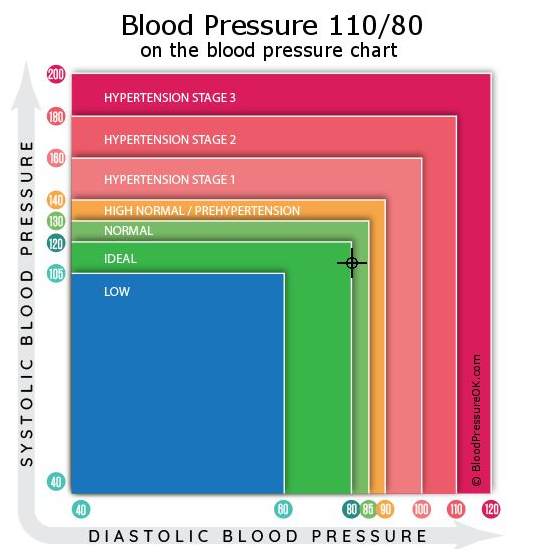

In [178]:
cardio_limpo = cardio_dataset.copy()

In [179]:
# Tratamento do ap_hi

# Valores negativos
# cardio_limpo["ap_hi"]=cardio_limpo["ap_hi"].abs()
cardio_limpo.loc[cardio_limpo.ap_hi < 0, 'ap_hi'] *= (-1)

# Valores menores que 50
cardio_limpo.loc[cardio_limpo.ap_hi < 50, 'ap_hi'] *= (10)

# Valores maiores que 300
cardio_limpo.loc[(cardio_limpo['ap_hi'] > 300) & (cardio_limpo['ap_hi'] < 10000), 'ap_hi'] //= 10
cardio_limpo.loc[(cardio_limpo['ap_hi'] >= 10000), 'ap_hi'] //= 100

cardio_limpo[cardio_limpo.ap_hi > 300].head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio


In [180]:
# Conversão a idade de dias para anos
cardio_limpo['age'] = (cardio_limpo['age'] / 365).astype(int)

In [231]:
# Tratamento do ap_lo

# Valores negativos
# cardio_limpo["ap_lo"]=cardio_limpo["ap_lo"].abs()
cardio_limpo.loc[cardio_limpo.ap_lo < 0, 'ap_lo'] *= (-1)

# Valores menores que 50
cardio_limpo.loc[cardio_limpo.ap_lo < 40, 'ap_lo'] *= (10)

# Valores maiores que 300
cardio_limpo.loc[(cardio_limpo['ap_lo'] > 200) & (cardio_limpo['ap_lo'] < 10000), 'ap_lo'] //= 10
cardio_limpo.loc[(cardio_limpo['ap_lo'] >= 10000), 'ap_lo'] //= 100

cardio_limpo[cardio_limpo.ap_lo > 200].head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio


In [182]:
# Eliminar incertezas
cardio_limpo = cardio_limpo[~((cardio_limpo.ap_hi < 50) | (cardio_limpo.ap_lo < 40) | (cardio_limpo.ap_hi < cardio_limpo.ap_lo) | (cardio_limpo.ap_hi == cardio_limpo.ap_lo) | (cardio_limpo.weight < 35))]
cardio_limpo.query('ap_hi<50 or ap_lo<40 or ap_hi<ap_lo or ap_hi==ap_lo')

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio


In [183]:
cardio_limpo.shape

(69801, 13)

# Representações Gráficas

### Variáveis Quantitativas
São aquelas que o seu valor pode ser medido em uma escala quantitativa. Divide-se em:
* **Variáveis discretas**: é uma caracteristica mensurável que pode assumir um número finito de valores. **Ex**: número de filhos, número de participantes em uma live, número de likes, entre outros. Neste dataset foram consideradas variáveis discretas as seguintes variáveis: age, ap_hi, ap_lo e height.
* **Variáveis contínuas**: é uma caracteristica mensurável que pode assumir qualquer valor dentro de um intervalo. **Ex**: altura de uma pessoa, tempo necessário para fazer um bom calulu de peixe, peso de uma pessoa, entre outros possíveis exemplos. Neste dataset foram consideradas variáveis discretas as seguintes variáveis: weight.



count    69801.000000
mean        52.841277
std          6.767492
min         29.000000
25%         48.000000
50%         53.000000
75%         58.000000
max         64.000000
Name: age, dtype: float64

Classes de Idade e as suas frequências
age
[29, 35)        4
[35, 40)     1778
[40, 45)     8459
[45, 50)    11106
[50, 55)    17280
[55, 60)    18157
[60, 65)    13017
Name: count, dtype: int64




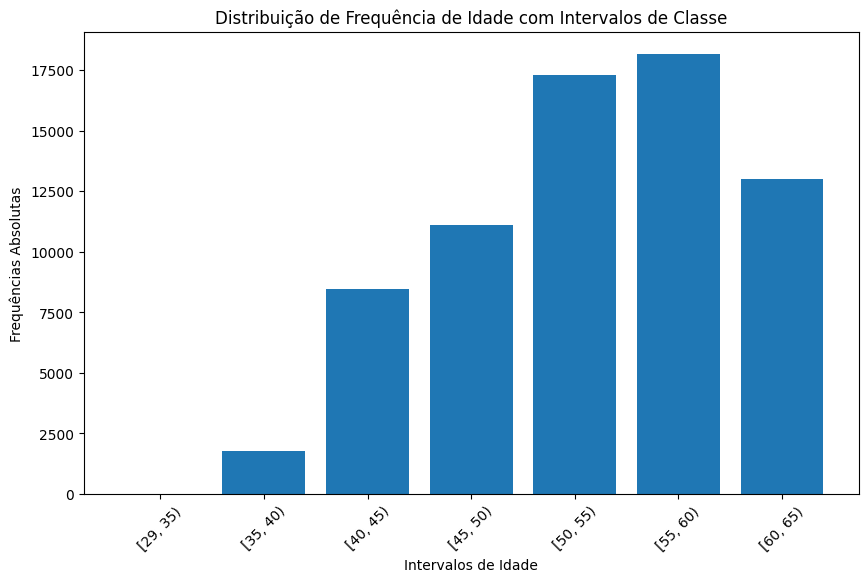

In [184]:
# Definição do conjunto de intervalos para a idade
grupos = [29, 35, 40, 45, 50, 55, 60, 65]

# Criação dos intervalos de idade
grupos_age = pd.cut(cardio_limpo['age'], grupos, right=False, include_lowest=True)

# Contar a frequência de cada grupo
freq_grupos_age = grupos_age.value_counts().sort_index()
print("{data}\n\nClasses de Idade e as suas frequências\n{conjuntos}\n\n".format(data=cardio_limpo['age'].describe(), conjuntos=freq_grupos_age))

# Definição da dimensão da largura e altura do gráfico
plt.figure(figsize=(10, 6))

# Criação de um gráfico
plt.bar(freq_grupos_age.index.astype(str), freq_grupos_age.values)

# Adicionar títulos e label(rótulos)
plt.title('Distribuição de Frequência de Idade com Intervalos de Classe')
plt.xlabel('Intervalos de Idade')
plt.ylabel('Frequências Absolutas')

# Rotacionar ou mudar o ângulo da label do eixo X
plt.xticks(rotation=45)

# Apresentar o plot
plt.show()

count    69801.000000
mean       127.065042
std         17.040118
min         60.000000
25%        120.000000
50%        120.000000
75%        140.000000
max        240.000000
Name: ap_hi, dtype: float64

Classes de Pressão arterial sistólica e as suas frequências
ap_hi
[50, 90)         74
[90, 120)     12702
[120, 140)    37617
[140, 191)    19222
[191, 301)      186
Name: count, dtype: int64




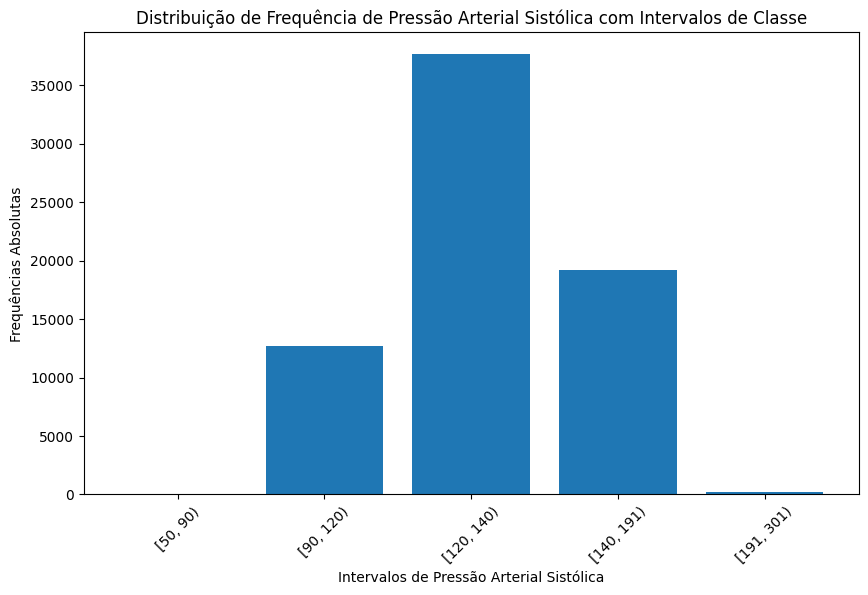

In [185]:
# Definição do conjunto de intervalos para a Pressão Arterial Sistólica
grupos = [50, 90, 120, 140, 191, 301]

# Criação dos intervalos de Pressão Arterial Sistólica
grupos_ap_hi = pd.cut(cardio_limpo['ap_hi'], grupos, right=False, include_lowest=True)

# Contar a frequência de cada grupo
freq_grupos_ap_hi = grupos_ap_hi.value_counts().sort_index()
print("{data}\n\nClasses de Pressão arterial sistólica e as suas frequências\n{conjuntos}\n\n".format(data=cardio_limpo['ap_hi'].describe(), conjuntos=freq_grupos_ap_hi))

# Definição da dimensão da largura e altura do gráfico
plt.figure(figsize=(10, 6))

# Criação de um gráfico
plt.bar(freq_grupos_ap_hi.index.astype(str), freq_grupos_ap_hi.values)

# Adicionar títulos e label(rótulos)
plt.title('Distribuição de Frequência de Pressão Arterial Sistólica com Intervalos de Classe')
plt.xlabel('Intervalos de Pressão Arterial Sistólica')
plt.ylabel('Frequências Absolutas')

# Rotacionar ou mudar o ângulo da label do eixo X
plt.xticks(rotation=45)

# Apresentar o plot
plt.show()

count    69801.000000
mean        81.582771
std          9.730598
min         40.000000
25%         80.000000
50%         80.000000
75%         90.000000
max        200.000000
Name: ap_lo, dtype: float64

Classes de Pressão arterial diastólica e as suas frequências
ap_lo
[40, 60)        117
[60, 80)      13945
[80, 90)      35461
[90, 101)     19381
[101, 121)      847
[121, 201)       50
Name: count, dtype: int64




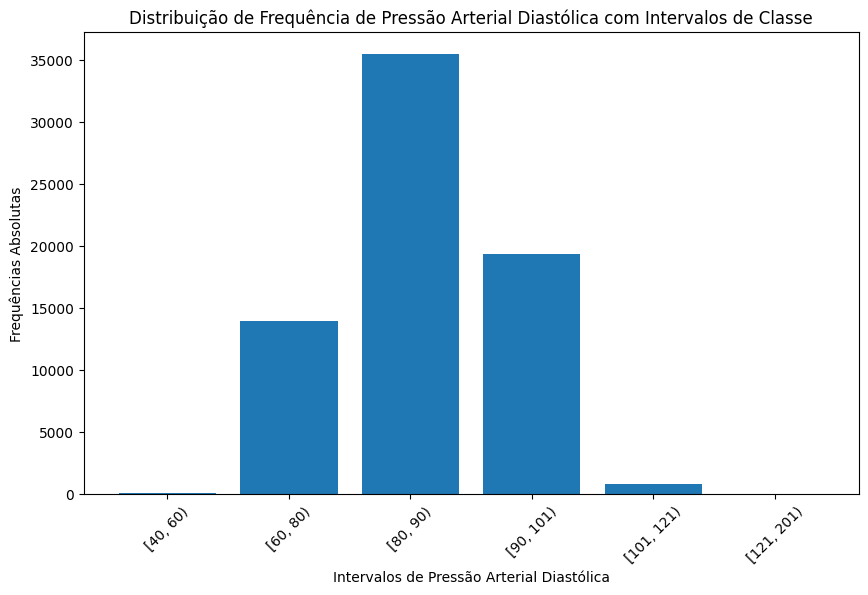

In [186]:
# Definição do conjunto de intervalos para a Pressão Arterial Diastólica
grupos = [40, 60, 80, 90, 101, 121, 201]

# Criação dos intervalos de Pressão Arterial Diastólica
grupos_ap_lo = pd.cut(cardio_limpo['ap_lo'], grupos, right=False, include_lowest=True)

# Contar a frequência de cada grupo
freq_grupos_ap_lo = grupos_ap_lo.value_counts().sort_index()
print("{data}\n\nClasses de Pressão arterial diastólica e as suas frequências\n{conjuntos}\n\n".format(data=cardio_limpo['ap_lo'].describe(), conjuntos=freq_grupos_ap_lo))

# Definição da dimensão da largura e altura do gráfico
plt.figure(figsize=(10, 6))

# Criação de um gráfico
plt.bar(freq_grupos_ap_lo.index.astype(str), freq_grupos_ap_lo.values)

# Adicionar títulos e label(rótulos)
plt.title('Distribuição de Frequência de Pressão Arterial Diastólica com Intervalos de Classe')
plt.xlabel('Intervalos de Pressão Arterial Diastólica')
plt.ylabel('Frequências Absolutas')

# Rotacionar ou mudar o ângulo da label do eixo X
plt.xticks(rotation=45)

# Apresentar o plot
plt.show()

count    69801.000000
mean        74.219371
std         14.378779
min         35.000000
25%         65.000000
50%         72.000000
75%         82.000000
max        200.000000
Name: weight, dtype: float64




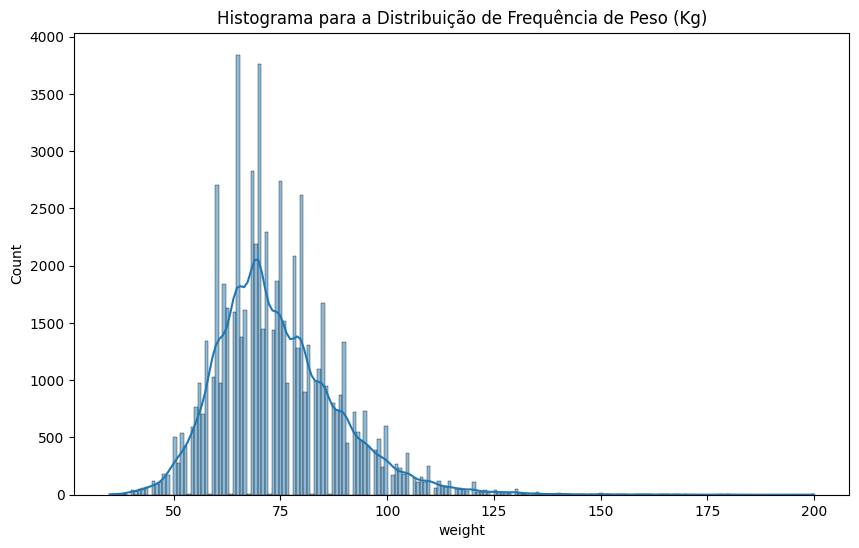

In [187]:
print("{data}\n\n".format(data=cardio_limpo['weight'].describe()))

# Definição da dimensão da largura e altura do gráfico
plt.figure(figsize=(10, 6))

# Criação de um histograma para a coluna "weight"
sns. .histplot(cardio_limpo['weight'], kde=True).set(title='Histograma para a Distribuição de Frequência de Peso (Kg)')
#plt.hist(cardio_limpo['weight'], bins='auto', alpha=0.7, rwidth=0.90)

# Apresentar
plt.show()

count    69801.000000
mean       164.360826
std          8.204030
min         55.000000
25%        159.000000
50%        165.000000
75%        170.000000
max        250.000000
Name: height, dtype: float64




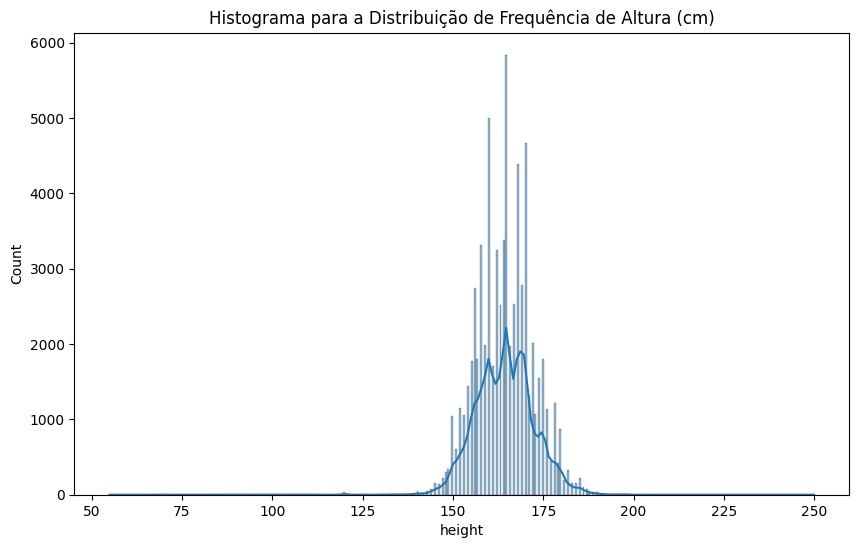

In [188]:
print("{data}\n\n".format(data=cardio_limpo['height'].describe()))

# Definição da dimensão da largura e altura do gráfico
plt.figure(figsize=(10, 6))

# Criação de um histograma para a coluna "height"
sns.histplot(cardio_limpo['height'], kde=True).set(title='Histograma para a Distribuição de Frequência de Altura (cm)')
#plt.hist(cardio_limpo['height'], bins='auto', alpha=0.7, rwidth=0.90)

# Apresentar
plt.show()

### Variáveis *Qualitativos* ou Categóricas
São aquelas que não podem ser medidas em uma escala numérica, mas é caracterizada por pertencer a uma categoria ou grupo. Dividem-se em:

- **Variáveis Nominais**: Não possuem uma ordem ou hierarquia. Exemplos: gênero, cor dos olhos. Neste dataset, foram consideradas variáveis nominais as seguintes variáveis: gender, smoking, alcohol intake, pyshical activity e o target.
- **Variáveis Ordinais**: Possuem uma ordem ou hierarquia. Exemplos: classificação de um hotel (1 a 5 estrelas), níveis de educação (ensino fundamental, médio, superior). Neste dataset, foram consideradas variáveis ordinais as seguintes variáveis: cholesterol e glucose.

In [189]:
cardio_limpo['gender'].value_counts()

gender
1    45411
2    24390
Name: count, dtype: int64

In [190]:
# Determinar a quantidade de cada categoria
freq_gender = cardio_limpo['gender'].value_counts()
freq_gender.index = ['Mulher', 'Homem']

# Criação do gráfico de sectores
fig = px.pie(values = freq_gender.values,
             names = freq_gender.index,
             color = ['G1', 'G2'],
             hole = 0.5,
             title='Gráfico de Sectores para a Variável "Gender"',
             color_discrete_map = {'G1': '#F7C0BB',
                                   'G2': '#30BFDD'
                                   }
             )

# Alterar o tamanho do gráfico
fig.update_layout(autosize=False, width=600, height=500)

# Apresentação do gráfico
fig.show()

In [191]:
# Determinar a quantidade de cada categoria
freq_smoke = cardio_limpo['smoke'].value_counts()
freq_smoke.index = ['Não Fumam', 'Fumam']

# Criação do gráfico de sectores
fig = px.pie(values = freq_smoke.values,
             names = freq_smoke.index,
             hole = 0.5,
             title='Gráfico de Sectores para a Variável "Smoke"'
             )

# Alterar o tamanho do gráfico
fig.update_layout(autosize=False, width=600, height=500)

# Apresentação do gráfico
fig.show()

In [192]:
# Determinar a quantidade de cada categoria
freq_active = cardio_limpo['active'].value_counts()
freq_active.index = ['Exercitam', 'Não Exercitam']

# Criação do gráfico de sectores
fig = px.pie(values = freq_active.values,
             names = freq_active.index,
             hole = 0.5,
             title='Gráfico de Sectores para a Variável "Active"'
             )

# Alterar o tamanho do gráfico
fig.update_layout(autosize=False, width=600, height=500)

# Apresentação do gráfico
fig.show()

In [193]:
# Determinar a quantidade de cada categoria
freq_alco = cardio_limpo['alco'].value_counts()
freq_alco.index = ['Não Consomem', 'Consomem']

# Criação do gráfico de sectores
fig = px.pie(values = freq_alco.values,
             names = freq_alco.index,
             hole = 0.5,
             title='Gráfico de Sectores para a Variável "Álcool"'
             )

# Alterar o tamanho do gráfico
fig.update_layout(autosize=False, width=600, height=500)

# Apresentação do gráfico
fig.show()

In [194]:
cardio_limpo['cholesterol'].value_counts()

cholesterol
1    52231
2     9525
3     8045
Name: count, dtype: int64

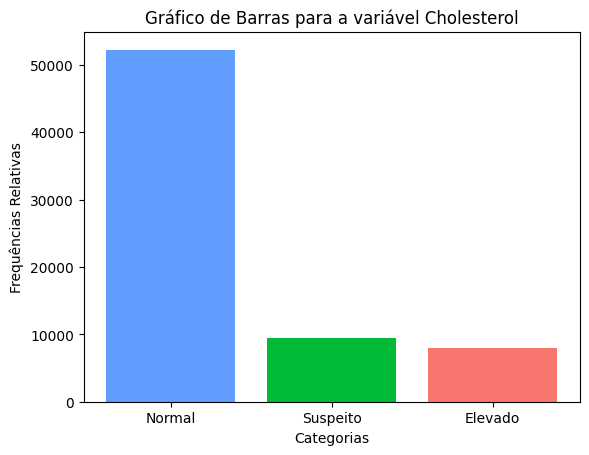

In [195]:
# Determinar a quantidade de cada categoria
freq_cho = cardio_limpo['cholesterol'].value_counts()
freq_cho.index = ['Normal', 'Suspeito', 'Elevado']

# Lista de cores
cores = ["#619cff", "#00ba38", "#f8766d"]

# Gráfico de Barras
plt.bar(x = freq_cho.index, height = freq_cho.values, color = cores)

# Atribuir rótulos
plt.xlabel('Categorias')
plt.ylabel('Frequências Relativas')

# Atribuir título
plt.title('Gráfico de Barras para a variável Cholesterol')

# Apresentação
plt.show()

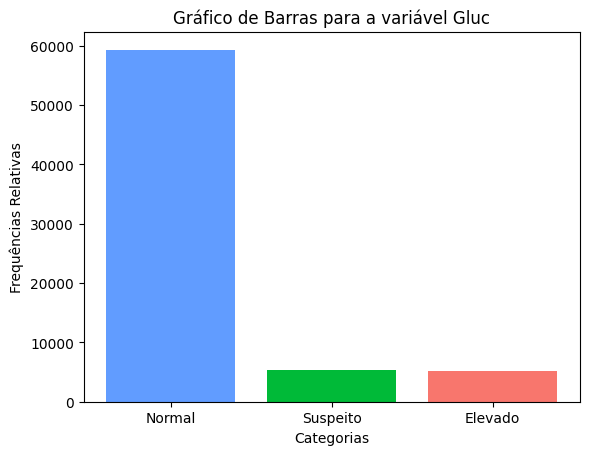

In [196]:
# Determinar a quantidade de cada categoria
freq_glu = cardio_limpo['gluc'].value_counts()
freq_glu.index = ['Normal', 'Suspeito', 'Elevado']

# Lista de cores
cores = ["#619cff", "#00ba38", "#f8766d"]

# Gráfico de Barras
plt.bar(x = freq_glu.index, height = freq_glu.values, color = cores)

# Atribuir rótulos
plt.xlabel('Categorias')
plt.ylabel('Frequências Relativas')

# Atribuir título
plt.title('Gráfico de Barras para a variável Gluc')

# Apresentação
plt.show()

### Qual é a relação entre os níveis de colesterol e doença cardiovascular?

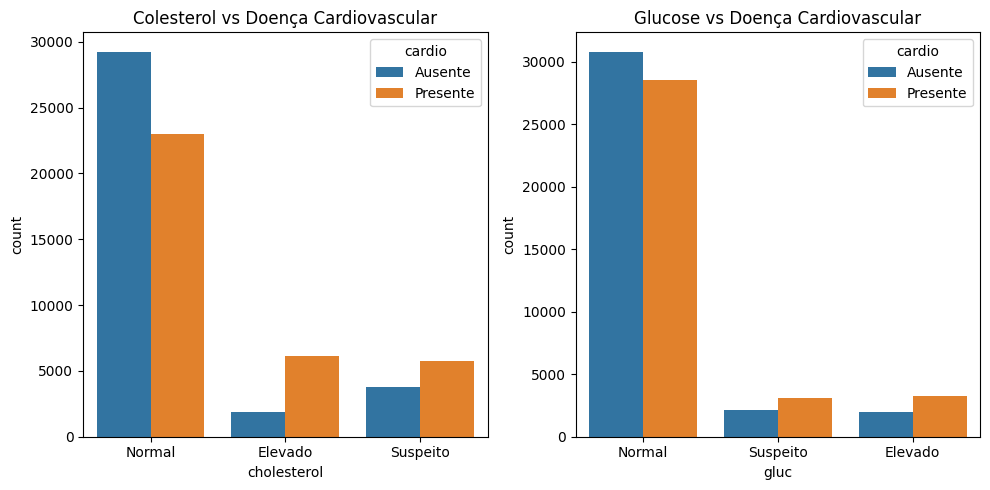

In [197]:
# Criar o gráfico de dispersão
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Criar dataframe apenas com as colunas cholesterol, gluc e cardio
cho_gluc_car = cardio_limpo[['cholesterol', 'gluc', 'cardio']].copy()

# Nomear os valores com nomes significativos
grupos = {1:'Normal', 2:'Suspeito', 3:'Elevado'}
cardio = {0:'Ausente', 1:'Presente'}

cho_gluc_car['cholesterol'] = cho_gluc_car['cholesterol'].replace(grupos)
cho_gluc_car['gluc'] = cho_gluc_car['gluc'].replace(grupos)
cho_gluc_car['cardio'] = cho_gluc_car['cardio'].replace(cardio)

# Colesterol vs doença cardiovascular
sns.countplot(x='cholesterol', hue='cardio', data=cho_gluc_car, ax=axs[0])
axs[0].set_title('Colesterol vs Doença Cardiovascular')

# Glicose vs doença cardiovascular
sns.countplot(x='gluc', hue='cardio', data=cho_gluc_car, ax=axs[1])
axs[1].set_title('Glucose vs Doença Cardiovascular')

plt.tight_layout()
plt.show()

### Qual é a quantidade de indivíduos que praticam actividade física entre os gêneros?

In [198]:
# Criar dataframe apenas com as colunas gender e active
gen_act = cardio_limpo[['gender', 'active']].copy()

# Nomear os valores com nomes significativos
gender = {1:'Mulher', 2:'Homem'}
active = {0:'Inactivo', 1:'Activo'}

gen_act['gender'] = gen_act['gender'].replace(gender)
gen_act['active'] = gen_act['active'].replace(active)

# Filtrar dados para homens e mulheres
homens = gen_act[gen_act['gender'] == 'Homem']
mulheres = gen_act[gen_act['gender'] == 'Mulher']

# Calcular contagem de indivíduos activos e inactivos para homens e mulheres
homem_act = homens['active'].value_counts()
mulher_act = mulheres['active'].value_counts()

# Criação do gráfico de sectores
fig = px.pie(values = homem_act.values,
             names = homem_act.index,
             hole = 0.5,
             title='Actividade Física para Homens'
             )

# Alterar o tamanho do gráfico
fig.update_layout(autosize=False, width=600, height=500)

# Apresentação do gráfico
fig.show()

# Criação do gráfico de sectores
fig1 = px.pie(values = mulher_act.values,
             names = mulher_act.index,
             hole = 0.5,
             title='Actividade Física para Mulheres'
             )

# Alterar o tamanho do gráfico
fig1.update_layout(autosize=False, width=600, height=500)

# Apresentação do gráfico
fig1.show()

# Machine learning

In [199]:
x = cardio_limpo.drop(['id','cardio'], axis=1)
y = cardio_limpo['cardio']

In [200]:
selectK = SelectKBest(score_func=chi2,k=8)
#Guarda um vector dos dados das features mais importantes
novoData = selectK.fit_transform(x,y)
# Quero o dataframe das features aptas
cols_idxs = selectK.get_support(indices=True)
x_ = x.iloc[:,cols_idxs]
#Apresento um sample das aptas
x_.head(2)

,age,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,active
0,50,62.0,110,80,1,1,0,1
1,55,85.0,140,90,3,1,0,1


In [201]:
cardio_limpo.cardio.value_counts()

cardio
0    34927
1    34874
Name: count, dtype: int64

In [202]:
x_tr, x_te, y_tr, y_te=train_test_split(x_,y,test_size=0.20,random_state=42)

In [203]:
# Padronização
scaler = StandardScaler()
x_tr_s = scaler.fit_transform(x_tr)
x_te_s = scaler.transform(x_te)

In [204]:
# Modelos
modelos = {
    "Regressão Logística": LogisticRegression(),
    "Árvore de Decisão": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting Classifier": GradientBoostingClassifier(),
    "SVM": SVC(),
    "SVM sem padronização": SVC(),
    "XGBoost": XGBClassifier()
}

In [205]:
melhorModelo = None
best_f1_score = 0

for nome, modelo in modelos.items():
  if (nome == 'SVM sem padronização'):
    modelo.fit(x_tr, y_tr)
    y_pred = modelo.predict(x_te).astype(int)

  else:
    modelo.fit(x_tr_s, y_tr)
    y_pred = modelo.predict(x_te_s).astype(int)

  # Calcula o classification report
  relatorio = classification_report(y_te, y_pred, digits=4)

  # Extrai o F-Score do relatório
  f1 = float(relatorio.split()[-2])

  # Escolhe o modelo com o maior F-Score
  if f1 > best_f1_score:
      best_f1_score = f1
      melhorModelo = nome

  print(f"Modelo: {nome}")
  print(f"Classification Report:\n{relatorio}\n")

Modelo: Regressão Logística
Classification Report:
              precision    recall  f1-score   support

           0     0.7097    0.7727    0.7399      6995
           1     0.7494    0.6826    0.7144      6966

    accuracy                         0.7277     13961
   macro avg     0.7295    0.7276    0.7272     13961
weighted avg     0.7295    0.7277    0.7272     13961


Modelo: Árvore de Decisão
Classification Report:
              precision    recall  f1-score   support

           0     0.6424    0.7155    0.6770      6995
           1     0.6775    0.6001    0.6364      6966

    accuracy                         0.6579     13961
   macro avg     0.6599    0.6578    0.6567     13961
weighted avg     0.6599    0.6579    0.6567     13961


Modelo: Random Forest
Classification Report:
              precision    recall  f1-score   support

           0     0.6935    0.7071    0.7002      6995
           1     0.7000    0.6862    0.6930      6966

    accuracy                       

In [206]:
print(f"O melhor modelo é: {melhorModelo}")

O melhor modelo é: Gradient Boosting Classifier


In [207]:
cv_scores = {}
for nome, modelo in modelos.items():
    if (nome != 'SVM sem padronização'):
      cv_score = cross_val_score(modelo, x_tr_s, y_tr, cv=5, scoring='f1').mean()
      print(f"{nome}: {cv_score}")

Regressão Logística: 0.713259839943007
Árvore de Decisão: 0.6301375832992104
Random Forest: 0.6887992581224652
Gradient Boosting Classifier: 0.7261572371631531
SVM: 0.719097783392334
XGBoost: 0.7200998283869888


In [208]:
gbc = GradientBoostingClassifier()
gbc.fit(x_tr_s, y_tr)
y_pred = gbc.predict(x_te_s).astype(int)
relatorio = classification_report(y_te, y_pred, digits=4)
print(relatorio)

              precision    recall  f1-score   support

           0     0.7239    0.7560    0.7396      6995
           1     0.7435    0.7105    0.7266      6966

    accuracy                         0.7333     13961
   macro avg     0.7337    0.7332    0.7331     13961
weighted avg     0.7337    0.7333    0.7331     13961



### Testando

In [235]:
teste = cardio_limpo.query("id == 1")
teste

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
1,1,55,1,156,85.0,140,90,3,1,0,0,1,1


In [236]:
teste = teste.drop(['id','cardio'], axis=1)
test = teste
teste = teste.iloc[:,cols_idxs]
teste

,age,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,active
1,55,85.0,140,90,3,1,0,1


In [238]:
predi = gbc.predict(teste)
if predi[0] == 1:
    print("O modelo prevê que o pacinte tem doença cardiovascular.")
else:
    print("O modelo prevê que o paciente não tem doença cardiovascular.")

O modelo prevê que o pacinte tem doença cardiovascular.
